# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In [1]:
# setting random state for reproducibility
random_state = 22

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Part 3: Customer Segmentation Report

The main bulk of the analysis is in this part of the project.

In this notebook we'll use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, we'll be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

As explained in the previous notebook, the KModes model was chosen because our variables are categorical.

In [2]:
# load in the data
azdias = pd.read_csv('data/clean_AZDIAS.csv')
customers = pd.read_csv('data/clean_CUSTOMERS.csv')

del azdias['Unnamed: 0']
del customers['Unnamed: 0']

In [3]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM
0,2,1.0,1.0,0.0,0.0,3.0,0.0,4.0,-1.0,-1.0,...,2.0,3.0,3.0,2.0,9.0,-1.0,3,0,3,1
1,-1,5.0,1.0,0.0,0.0,1.0,0.0,3.0,5.0,3.0,...,6.0,7.0,4.0,6.0,4.0,7.0,3,1,4,0
2,-1,1.0,1.0,0.0,0.0,1.0,0.0,4.0,-1.0,-1.0,...,10.0,10.0,10.0,-1.0,-1.0,-1.0,3,0,3,0
3,-1,1.0,2.0,0.0,0.0,3.0,0.0,4.0,6.0,4.0,...,4.0,7.0,4.0,3.0,9.0,3.0,1,1,1,1
4,-1,1.0,12.0,0.0,1.0,0.0,0.0,4.0,4.0,8.0,...,6.0,9.0,10.0,-1.0,5.0,1.0,5,0,1,1


### Data pre-processing

As we tested on the previous notebook, we'll be applying `StandardScaler` followed by `PCA` with `175 components` for dimensionality reduction.

In [4]:
# Scale data
scaler = StandardScaler()

azdias_scaled = scaler.fit_transform(azdias)
customers_scaled = scaler.transform(customers)

In [5]:
n_pca = 175

In [18]:
pca = PCA(n_components = n_pca, random_state=random_state)

azdias_pca = pca.fit_transform(azdias_scaled)
azdias_pca = pd.DataFrame(azdias_pca)

customers_pca = pca.transform(customers_scaled)
customers_pca = pd.DataFrame(customers_pca)

### Modeling

Now it's time to start the modeling phase!

As we've already tested a couple approaches on the previous notebook, now it's time to implement the chosen model.

In [19]:
# Convert dataframes to matrix
azdiasMatrix = azdias_pca.to_numpy()
customersMatrix = customers_pca.to_numpy()

In [20]:
k = 5

In [25]:
kmodes = KModes(n_clusters = k, init = 'Huang', random_state = random_state)

#### AZDIAS

In [24]:
# train model
y_pred_azdias = kmodes.fit_predict(azdiasMatrix)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [8]:
# create cluster column and add to the dataframe
azdias_pca['cluster'] = kmodes.labels_

In [10]:
azdias_pca.head()

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM,cluster
0,2,1.0,1.0,0.0,0.0,3.0,0.0,4.0,-1.0,-1.0,...,3.0,3.0,2.0,9.0,-1.0,3,0,3,1,1
1,-1,5.0,1.0,0.0,0.0,1.0,0.0,3.0,5.0,3.0,...,7.0,4.0,6.0,4.0,7.0,3,1,4,0,0
2,-1,1.0,1.0,0.0,0.0,1.0,0.0,4.0,-1.0,-1.0,...,10.0,10.0,-1.0,-1.0,-1.0,3,0,3,0,1
3,-1,1.0,2.0,0.0,0.0,3.0,0.0,4.0,6.0,4.0,...,7.0,4.0,3.0,9.0,3.0,1,1,1,1,6
4,-1,1.0,12.0,0.0,1.0,0.0,0.0,4.0,4.0,8.0,...,9.0,10.0,-1.0,5.0,1.0,5,0,1,1,7


In [15]:
azdias_pca.cluster.value_counts().sort_index()

0    44870
1    30482
2    29115
3    10910
4    26020
5    38479
6    20757
7    22172
Name: cluster, dtype: int64

In [20]:
y_pred_customers = kmodes.predict(customersMatrix)

In [21]:
customers_pca['cluster'] = y_pred_customers

In [22]:
customers_pca.head()

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM,clusters
0,0,1.0,3.0,0.0,0.0,1.0,0.0,4.0,7.0,6.0,...,2.0,1.0,6.0,9.0,2.0,3,1,4,0,0
1,-1,1.0,1.0,0.0,0.0,2.0,0.0,3.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,3,1,2,0,1
2,1,1.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0,3.0,...,4.0,2.0,6.0,9.0,2.0,4,0,4,0,3
3,-1,1.0,7.0,0.0,0.0,1.0,0.0,2.0,3.0,7.0,...,11.0,8.0,6.0,9.0,3.0,3,1,4,1,0
4,-1,1.0,1.0,0.0,0.0,2.0,0.0,3.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,3,1,2,0,1


In [24]:
customers_pca.clusters.value_counts().sort_index()

0    17237
1    13283
2     3437
3     6005
4     1323
5     5886
6      368
7      374
Name: clusters, dtype: int64

In [14]:
kmodes.cost_

29462625.0

In [72]:
# check the sillhouette score
labels = kmodes.labels_
metrics.silhouette_score(azdiasMatrix, labels, random_state = random_state)

<IPython.core.display.Javascript object>

-0.06751374032054142

In [ ]:
from yellowbrick.cluster import kelbow_visualizer
visualizer = kelbow_visualizer(kmodes, azdias_pca, k=k)

Automatically created module for IPython interactive environment
For n_clusters = 4 The average silhouette_score is : -0.028128190589976985


AttributeError: 'KModes' object has no attribute 'cluster_centers_'

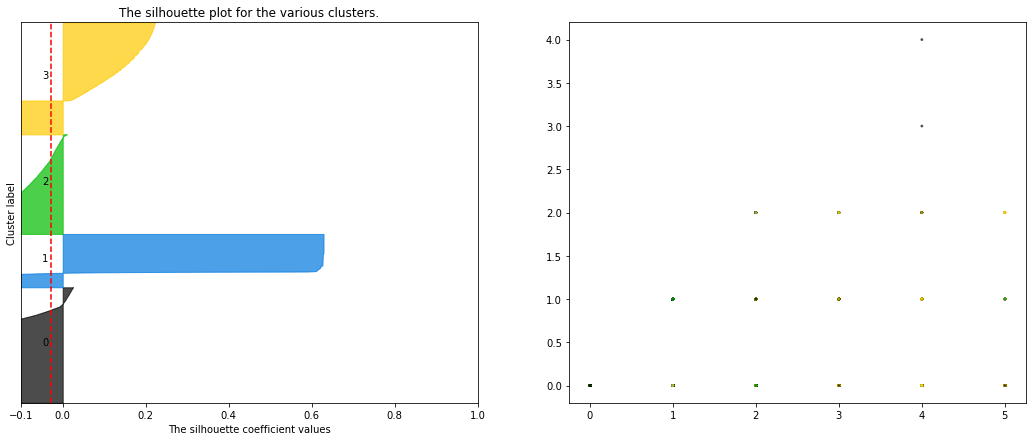

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

print(__doc__)

X, y = azdiasMatrix, y_pred_azdias

range_n_clusters = [4, 8, 12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 4 for reproducibility.
    clusterer = KModes(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 5], X[:, 6], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 5], centers[:, 6], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[5], c[6], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Now that we've got our clusters in the datasets, let's create a new dataset with the amount of indivuduals in each cluster for each of the datasets. This way we can make some plots to better visualize how they're distributed.

,azdias,customers
0,20.138686,35.975622
1,13.681022,27.723165
2,13.067481,7.173418
3,4.896659,12.533133
4,11.678373,2.761255
5,17.270259,12.284766
6,9.316218,0.768059
7,9.951303,0.780581


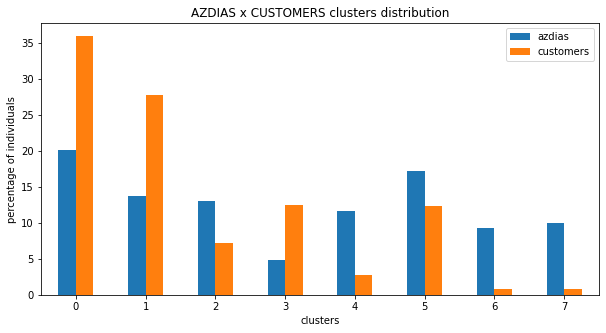

In [70]:
clusters_dict = {
    'azdias': azdias_pca.cluster.value_counts().sort_index() / azdias_pca.shape[0] *100,
    'customers': customers_pca.clusters.value_counts().sort_index() / customers_pca.shape[0] *100
}

df_clusters = pd.DataFrame(clusters_dict)

# making plot
ax = df_clusters.plot.bar(rot=0, figsize=(10,5))
ax.set_title('AZDIAS x CUSTOMERS clusters distribution')
ax.set_xlabel('clusters')
ax.set_ylabel('percentage of individuals')

df_clusters

Now we're talking!! Look at how significant that simple plot can be.

We can see clearly that clusters 0 and 1 are a strong representation of our customers especially compared to the population.

Right under those, there's cluster 3 which is also quite representative of our customers.

Cluster 5 is just as representative as cluster 3, it's just not as obvious because it's also quite representative of the population.

With that in mind, let's get down to getting to know those clusters that best represent our customers so we can draw sort of a profile of them.

In [13]:
# columns for centroids
cluster_col = ['cluster']
cols = [col for col in azdias if col not in cluster_col]

# make index for cluster interpretation
index = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6']

# make dataframe
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM
First Cluster,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,6.0,8.0,...,10.0,6.0,3.0,6.0,9.0,3.0,3.0,0.0,4.0,1.0
Second Cluster,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,-1.0,-1.0,...,10.0,10.0,10.0,-1.0,-1.0,-1.0,3.0,0.0,3.0,0.0
Third Cluster,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,6.0,8.0,...,10.0,10.0,7.0,4.0,9.0,3.0,3.0,1.0,3.0,1.0
Fourth Cluster,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,...,7.0,6.0,2.0,6.0,9.0,3.0,3.0,1.0,3.0,0.0
Fifth Cluster,-1.0,9.0,10.0,0.0,0.0,1.0,0.0,4.0,1.0,9.0,...,10.0,9.0,10.0,6.0,9.0,3.0,4.0,0.0,3.0,1.0
Sixth Cluster,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,6.0,4.0,...,3.0,3.0,4.0,3.0,9.0,7.0,4.0,0.0,3.0,1.0
Seventh Cluster,-1.0,9.0,2.0,0.0,0.0,1.0,0.0,4.0,6.0,8.0,...,8.0,9.0,8.0,6.0,9.0,3.0,4.0,1.0,2.0,1.0
Eighth Cluster,-1.0,9.0,2.0,0.0,0.0,1.0,0.0,3.0,6.0,6.0,...,9.0,12.0,10.0,6.0,9.0,3.0,4.0,0.0,1.0,1.0
